# Temperature Calculator

**Objective**: Write a function that accepts an observed Flux (in Jy), a frequency (in GHz), and a source size (in arcseconds), and outputs the Brightness Temperature in Kelvin.

In [3]:
# Import the libraries and define necessary functions

import numpy as np

def calculate_brightness_temp(flux_jy, freq_ghz, size_arcsec):
    """
    Converts observed Flux Density to Brightness Temperature.
    
    Parameters:
    flux_jy     : Flux density in Janskys (Jy)
    freq_ghz    : Frequency in GHz
    size_arcsec : Angular diameter of the source in arcseconds (assuming circular)
    
    Returns:
    Tb (Kelvin)
    """
    # 1. Convert inputs to SI units
    S_nu = flux_jy * 1e-26          # Jy to W/m^2/Hz
    nu = freq_ghz * 1e9             # GHz to Hz
    
    # Convert arcsec to radians for Solid Angle calculation
    # Solid angle Omega roughly equals (theta_rad)^2 for small angles
    theta_rad = np.deg2rad(size_arcsec / 3600.0)
    Omega = (np.pi * (theta_rad / 2)**2) # Area of circle = pi * r^2
    
    # Constants
    c = 3.0e8
    k = 1.38e-23
    
    # 2. Apply the Rayleigh-Jeans inversion formula
    # Tb = (c^2 * S_nu) / (2 * k * nu^2 * Omega)
    numerator = c**2 * S_nu
    denominator = 2 * k * (nu**2) * Omega
    
    Tb = numerator / denominator
    return Tb

In [5]:
# Test Case:

# A typical weak radio source: 
# Flux = 10 mJy (0.01 Jy)
# Frequency = 5 GHz
# Size = 1 arcsecond (very compact)

S_input = 0.01 
freq_input = 5.0
size_input = 1.0

Tb = calculate_brightness_temp(S_input, freq_input, size_input)

print(f"*** Source Properties ***")
print(f"Flux Density: {S_input} Jy")
print(f"Frequency:    {freq_input} GHz")
print(f"Size:         {size_input} arcsec")
print(f"************************")
print(f"Calculated Brightness Temperature: {Tb:.2f} K")

*** Source Properties ***
Flux Density: 0.01 Jy
Frequency:    5.0 GHz
Size:         1.0 arcsec
************************
Calculated Brightness Temperature: 706.57 K


In [6]:
# 3. Visualizations

import matplotlib.pyplot as plt

# 1. Define the Parameter Space
# We use logspace because these values span many orders of magnitude
flux_min, flux_max = 0.001, 100.0   # 1 mJy to 100 Jy
size_min, size_max = 0.01, 1000.0   # 0.01 arcsec to 1000 arcsec (mas to deg scale)

fluxes = np.logspace(np.log10(flux_min), np.log10(flux_max), 100)
sizes = np.logspace(np.log10(size_min), np.log10(size_max), 100)

# Create a grid
F, S = np.meshgrid(fluxes, sizes)

In [7]:
# 4. Calculations

# Constants
c = 3.0e8
k = 1.38e-23
freq_ghz = 5.0  # Let's fix the frequency at 5 GHz for this map
nu = freq_ghz * 1e9

# Convert grid units to SI
F_si = F * 1e-26  # Jy -> W/m^2/Hz
S_rad = np.deg2rad(S / 3600.0) # arcsec -> radians
Omega = np.pi * (S_rad / 2)**2

# Calculate Tb for every point in the grid
# Tb = (c^2 * S_nu) / (2 * k * nu^2 * Omega)
Tb_grid = (c**2 * F_si) / (2 * k * nu**2 * Omega)

<a list of 6 text.Text objects>

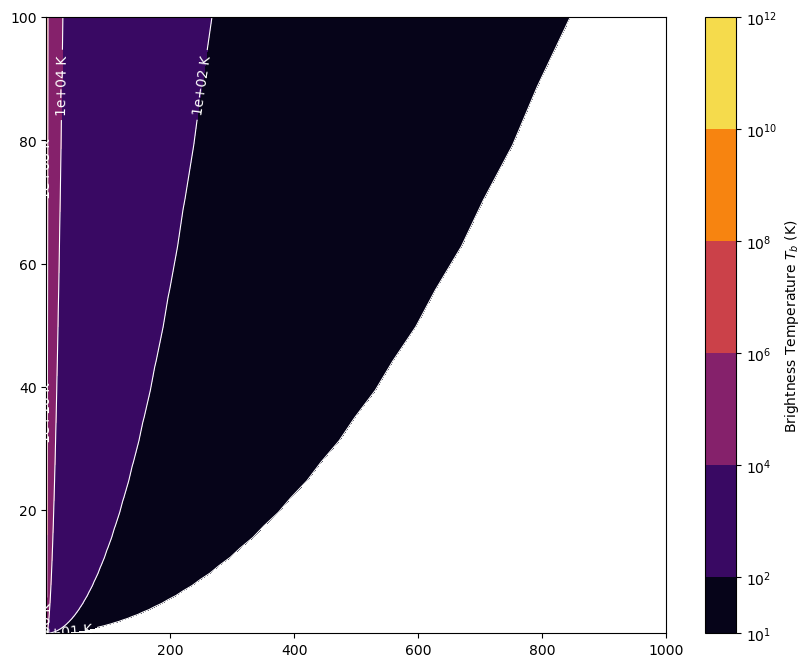

In [8]:
# 3. Plotting the Diagnostic Diagram 
plt.figure(figsize=(10, 8))

# Create the contour plot
# We define specific levels to map to physical regimes
levels = [10, 100, 10**4, 10**6, 10**8, 10**10, 10**12]
cp = plt.contourf(S, F, Tb_grid, levels=levels, locator=plt.LogLocator(), cmap='inferno')
plt.colorbar(cp, label='Brightness Temperature $T_b$ (K)')

# Add contour lines for clarity
lines = plt.contour(S, F, Tb_grid, levels=levels, colors='white', linewidths=0.8)
plt.clabel(lines, inline=True, fontsize=10, fmt='%1.0e K')

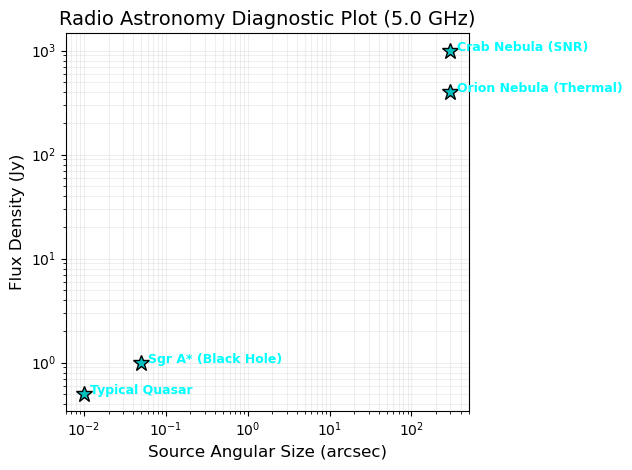

In [9]:
# 4. Annotate "Real" Objects for Context
# Let's plot where some famous objects might land at 5 GHz
# (Approximate values for illustration)
objects = {
    "Orion Nebula (Thermal)": (300, 400), # Big size (~5 arcmin), Bright Flux
    "Crab Nebula (SNR)": (300, 1000),     # Big size, Very Bright Flux
    "Sgr A* (Black Hole)": (0.05, 1.0),   # Tiny size, Moderate Flux
    "Typical Quasar": (0.01, 0.5)         # Unresolved, Moderate Flux
}

for name, (size, flux) in objects.items():
    plt.plot(size, flux, 'c*', markersize=12, markeredgecolor='black')
    plt.text(size * 1.2, flux, name, color='cyan', fontsize=9, fontweight='bold')

# Formatting
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Source Angular Size (arcsec)', fontsize=12)
plt.ylabel('Flux Density (Jy)', fontsize=12)
plt.title(f'Radio Astronomy Diagnostic Plot ({freq_ghz} GHz)', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()